<h1 id="Exploratory_Data_Analysis">
1. Exploratory Data Analysis
<a class="anchor-link" href="https://www.kaggle.com/johnmantios/travel-review-ratings-dataset/edit/run/47115230#Exploratory_Data_Analysis">¶</a>
</h1>

In [944]:
import numpy as np
import pandas as pd


data = pd.read_csv('/Users/johnmantios1/Desktop/Διπλωματική/teaching assistant evaluation/tae.data', index_col=False, names = ['speaker', 'course_instructor', 'course', 'semester', 'class_size', 'class'], )  
 

In [945]:
data

,speaker,course_instructor,course,semester,class_size,class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [946]:
data.describe()

,speaker,course_instructor,course,semester,class_size,class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [947]:
data.isna().sum()

speaker              0
course_instructor    0
course               0
semester             0
class_size           0
class                0
dtype: int64

In [948]:
data = data.drop_duplicates()

In [949]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   speaker            110 non-null    int64
 1   course_instructor  110 non-null    int64
 2   course             110 non-null    int64
 3   semester           110 non-null    int64
 4   class_size         110 non-null    int64
 5   class              110 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


In [950]:
for col in data.columns:
    print(data[col].value_counts())

2    85
1    25
Name: speaker, dtype: int64
23    13
13    10
22    10
9      7
18     6
14     6
7      6
10     5
20     5
6      5
15     5
17     4
8      4
2      3
5      3
1      3
16     3
11     2
12     2
3      2
25     2
24     1
19     1
4      1
21     1
Name: course_instructor, dtype: int64
3     32
2     12
1     11
17     7
15     7
7      5
11     5
5      3
8      3
25     2
6      2
9      2
13     2
16     2
18     2
21     2
22     2
14     1
12     1
10     1
19     1
20     1
4      1
23     1
24     1
26     1
Name: course, dtype: int64
2    95
1    15
Name: semester, dtype: int64
20    8
19    7
29    5
27    5
17    5
31    4
37    4
38    4
42    4
11    4
10    4
24    4
25    3
21    3
23    2
22    2
58    2
30    2
13    2
15    2
14    2
18    2
36    2
39    2
12    2
45    2
48    2
51    2
16    1
9     1
7     1
5     1
66    1
28    1
26    1
32    1
33    1
34    1
35    1
43    1
44    1
46    1
49    1
54    1
55    1
3     1
Name: class_size, d

In [951]:
import plotly.express as px

fig = px.box(data, y = ['speaker', 'course_instructor', 'course', 'semester', 'class_size'] )
fig.show()

In [952]:
#outliers calculation

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 5 * IQR)) | (data > (Q3 + 5 * IQR))).sum()

speaker              25
course_instructor     0
course                0
semester             15
class_size            0
class                 0
dtype: int64

<AxesSubplot:>

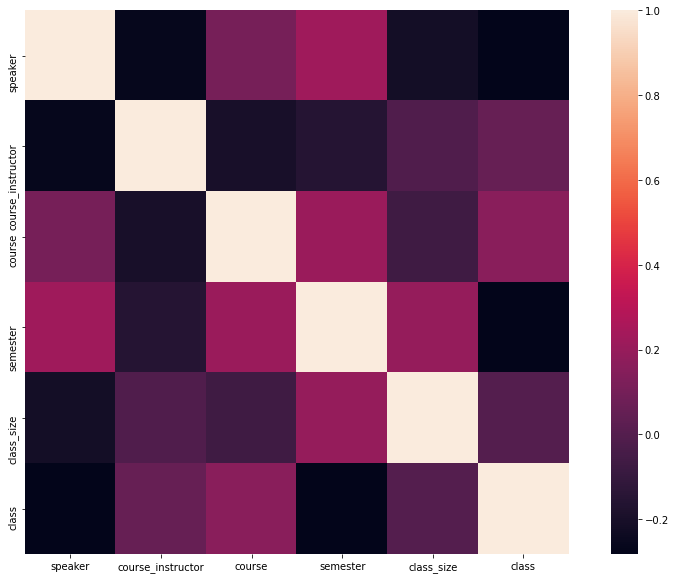

In [1009]:
import seaborn as sns

plt.figure(figsize=(15,10))
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [953]:
#uncomment if you want to delete outliers

#data = data[(data >= (Q1 - 1.5*IQR)) & (data <= (Q1 + 1.5*IQR))]

#data = data.dropna()

#data.describe()

In [954]:
X = data.drop(['class'], axis=1)
y = data['class']

In [955]:
#feature importance with ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier


forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X , y)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:]

print('Top features:')
for f in range(0,5):
    print('%d. feature %d (%f)' % (f , indices[f], importances[indices[f]]))

Top features:
0. feature 2 (0.306767)
1. feature 4 (0.205362)
2. feature 0 (0.169281)
3. feature 1 (0.167393)
4. feature 3 (0.151198)


In [956]:
#feature importance with RFECV

from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state = 42)
selector = RFECV(estimator, cv=10, step=1)
selector = selector.fit(X, y)
selector.support_


selector.ranking_

array([1, 4, 1, 3, 2])

In [957]:
#X = X.drop(['semester'], axis=1)

In [958]:
X = pd.DataFrame(X)
X.describe()

,speaker,course_instructor,course,semester,class_size
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1.772727,14.027273,8.145455,1.863636,27.281818
std,0.420988,6.780245,7.163665,0.344745,13.141525
min,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,9.000000,3.000000,2.000000,18.250000
50%,2.000000,14.000000,3.500000,2.000000,25.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000


In [959]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [960]:
print(y_train.value_counts())

3    30
2    29
1    29
Name: class, dtype: int64


In [961]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_jobs=-1, random_state=1)
isf.fit(X_train, y_train)

print(isf.score_samples(X_train))

[-0.5281556  -0.51162644 -0.40292474 -0.49469621 -0.4774662  -0.59909033
 -0.43865208 -0.42373851 -0.41269168 -0.39656776 -0.46851392 -0.41608766
 -0.41491091 -0.44763415 -0.51530923 -0.55347864 -0.49207938 -0.50873962
 -0.56062503 -0.52788617 -0.43874745 -0.57861929 -0.49970453 -0.51163995
 -0.52598147 -0.44473349 -0.44825432 -0.47642046 -0.52928313 -0.51743116
 -0.60582518 -0.4108061  -0.42261998 -0.46455619 -0.4207645  -0.47510838
 -0.413054   -0.49207938 -0.50503946 -0.5117662  -0.42793895 -0.56127913
 -0.46026216 -0.47457713 -0.47793414 -0.54709612 -0.4751507  -0.44199145
 -0.65861288 -0.54970315 -0.54743162 -0.42134994 -0.44989542 -0.4858914
 -0.58066768 -0.39560472 -0.5585621  -0.57438502 -0.46347903 -0.53742726
 -0.56776123 -0.42586307 -0.5802075  -0.44940986 -0.48265951 -0.48847066
 -0.41858972 -0.59019792 -0.47167088 -0.46540008 -0.50033719 -0.52446217
 -0.52598147 -0.46713121 -0.5557101  -0.5712208  -0.56954017 -0.48185214
 -0.40196    -0.45767116 -0.50681189 -0.40403425 -0.

In [962]:
isf.predict(X_train).sum()

14

In [963]:
# Get names of indexes for which score samples have value -1
indexNames = X_train[ isf.score_samples(X_train) == -1 ].index
# Delete these row indexes from dataFrame
X_train.drop(indexNames , inplace=True)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [964]:
#uncomment if you want to oversample using SMOTE

#from imblearn.over_sampling import SMOTE

#sm = SMOTE(random_state = 42)
           
#X_train, y_train = sm.fit_sample(X_train, y_train) 

In [965]:
print(y_train.value_counts())

3    30
2    29
1    29
Name: class, dtype: int64


In [966]:
#scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
standardized_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [967]:
np.unique(y_test)

array([1, 2, 3])

<h1 id="Decision_Tree:_Gini_Criterion">
2. Decision Tree: Gini Criterion
<a class="anchor-link" href="https://www.kaggle.com/johnmantios/travel-review-ratings-dataset/edit/run/47115230#Decision_Tree:_Gini_Criterion">¶</a>
</h1>

In [968]:
from sklearn.metrics import log_loss


training_loss = []
test_loss = []

def tree_scores(i):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state = 42)
    
    
    clf_gini.fit(standardized_X_train, y_train)
    y_pred_gini = clf_gini.predict_proba(standardized_X_test)
    y_pred_train_gini = clf_gini.predict_proba(standardized_X_train)
     
    #print('Max Depth:' ,i)    
    #print('Training set score: {:.4f}'.format(clf_gini.score(standardized_X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_gini))

    #print('Test set score: {:.4f}'.format(clf_gini.score(standardized_X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_gini))
     
        
for i in range(1,11):
    tree_scores(i)

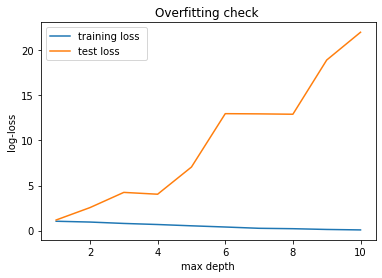

In [969]:
import matplotlib.pyplot as plt

y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('max depth')
# Set the y axis label of the current axis.
plt.ylabel('log-loss')
# Set a title of the current axes.
plt.title('Overfitting check ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [970]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(1,20)}
clf = GridSearchCV(DecisionTreeClassifier(criterion='gini', random_state = 42),  parameters, n_jobs=4)
clf.fit(X=standardized_X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.3516339869281046 {'max_depth': 2}


In [971]:
## from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state = 42, min_samples_split=20, min_samples_leaf=9)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_gini, standardized_X_train, y_train, cv=kfold)))

Cross-Validation Score: 0.43888888888888894


In [972]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state = 42,  min_samples_leaf=9)

clf_gini.fit(standardized_X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=9, random_state=42)

In [973]:
y_pred_gini = clf_gini.predict(standardized_X_test)

In [974]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test, y_pred_gini))

Accuracy: 0.4090909090909091


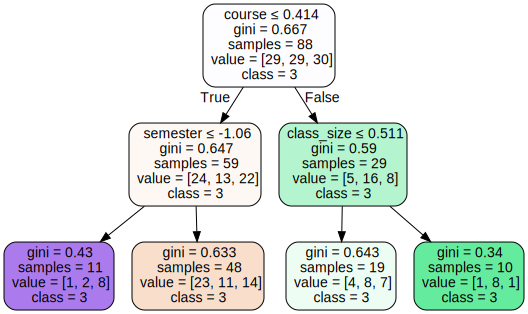

In [975]:
import seaborn as sns
%matplotlib inline
import graphviz
from sklearn import tree



dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=standardized_X_train.columns,  
                              class_names=y_train.apply(str),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Confusion matrix

 [[7 0 0]
 [6 0 1]
 [2 4 2]]


[Text(0, 0.5, '1'), Text(0, 1.5, '2'), Text(0, 2.5, '3')]

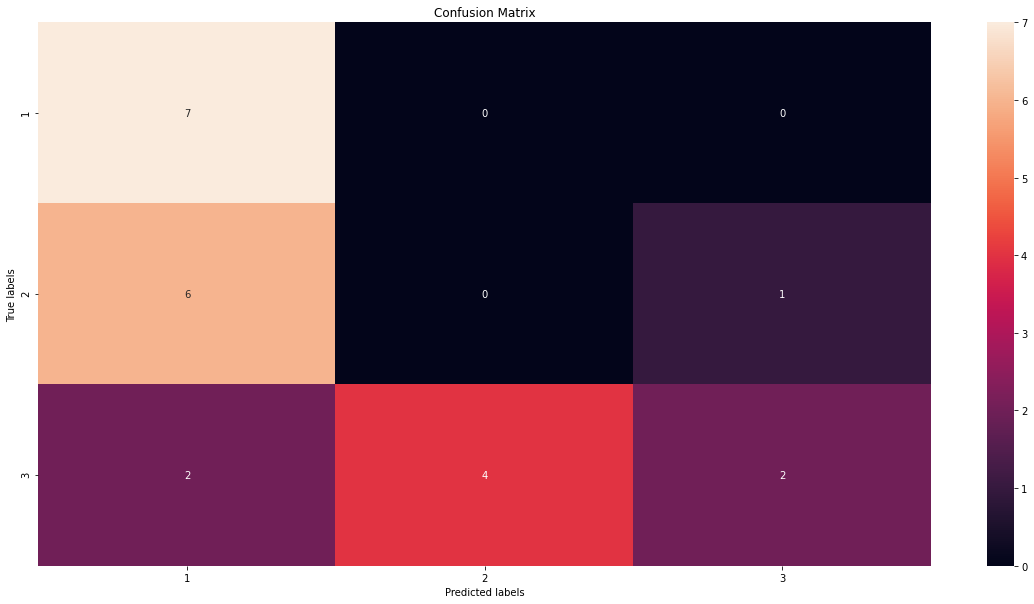

In [976]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(np.unique(y_test))
ax.yaxis.set_ticklabels(np.unique(y_test))

In [977]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       0.47      1.00      0.64         7
           2       0.00      0.00      0.00         7
           3       0.67      0.25      0.36         8

    accuracy                           0.41        22
   macro avg       0.38      0.42      0.33        22
weighted avg       0.39      0.41      0.33        22



<h1 id="Decision_Tree:_Entropy_Criterion">
3. Decision Tree: Entropy Criterion
<a class="anchor-link" href="https://www.kaggle.com/johnmantios/travel-review-ratings-dataset/edit/run/47115230#Decision_Tree:_Entropy_Criterion">¶</a>
</h1>

In [978]:
training_loss = []
test_loss = []

def tree_scores(i):
    clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state = 42)
    
    
    clf_en.fit(standardized_X_train, y_train)
    y_pred_en = clf_en.predict_proba(standardized_X_test)
    y_pred_train_en = clf_en.predict_proba(standardized_X_train)
    
     
    #print('Max Depth:' ,i)    
    #print('Training set score: {:.4f}'.format(clf_en.score(standardized_X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_en))

    #print('Test set score: {:.4f}'.format(clf_en.score(standardized_X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_en))
     
        
for i in range(1,11):
    tree_scores(i)

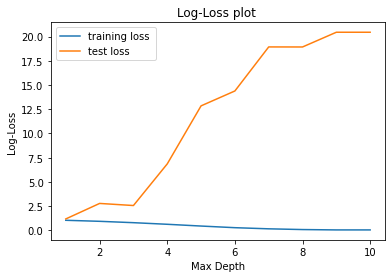

In [979]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [980]:
parameters = {'max_depth':range(1,10)}
clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state = 42),  parameters, n_jobs=4)
clf.fit(X=standardized_X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.4196078431372549 {'max_depth': 4}


In [981]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state = 42, min_samples_leaf = 5, max_leaf_nodes = 9)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_en, standardized_X_train, y_train, cv=kfold)))

Cross-Validation Score: 0.37222222222222223


In [989]:
path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(standardized_X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

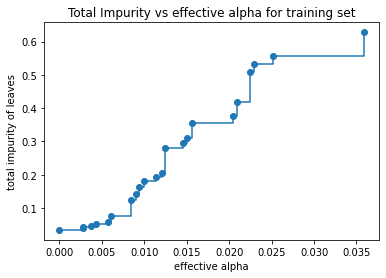

In [990]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [991]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [992]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03847898986142184 and a depth of: 0


In [993]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

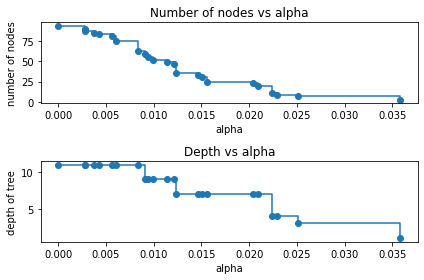

In [994]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

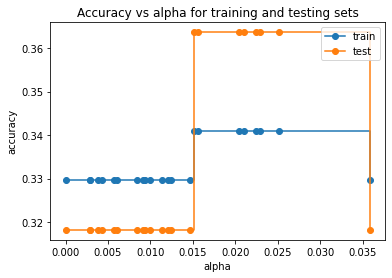

In [1000]:
train_scores = [clf.score(standardized_X_train, y_train) for clf in clfs]
test_scores = [clf.score(standardized_X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1001]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(standardized_X_train, y_train))
print('Test accuracy of best model: ',best_model.score(standardized_X_test, y_test))

Training accuracy of best model:  0.3409090909090909
Test accuracy of best model:  0.36363636363636365


In [1002]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 42)

clf_en.fit(standardized_X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [1003]:
y_pred_en = clf_en.predict(standardized_X_test)

In [1004]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test, y_pred_en))

Accuracy: 0.6363636363636364


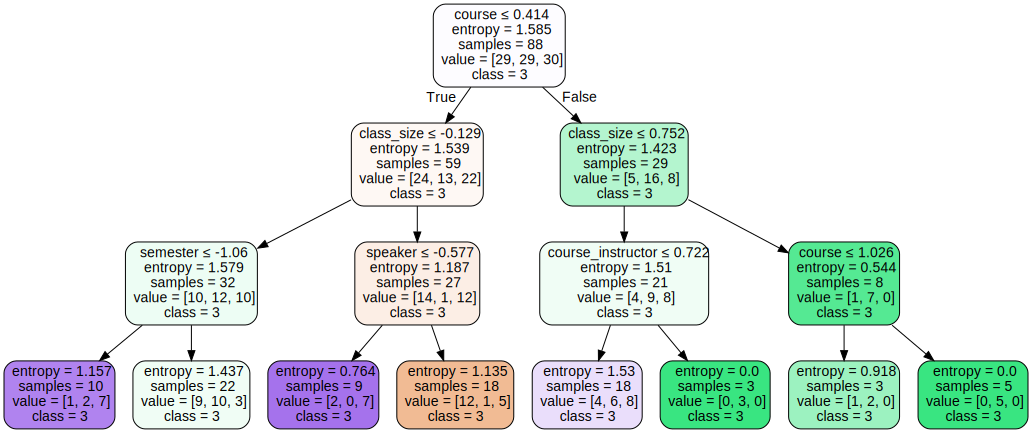

In [1005]:


dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=standardized_X_train.columns,  
                              class_names=y_train.apply(str),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [1006]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5 2 0]
 [3 3 1]
 [0 2 6]]


[Text(0, 0.5, '1'), Text(0, 1.5, '2'), Text(0, 2.5, '3')]

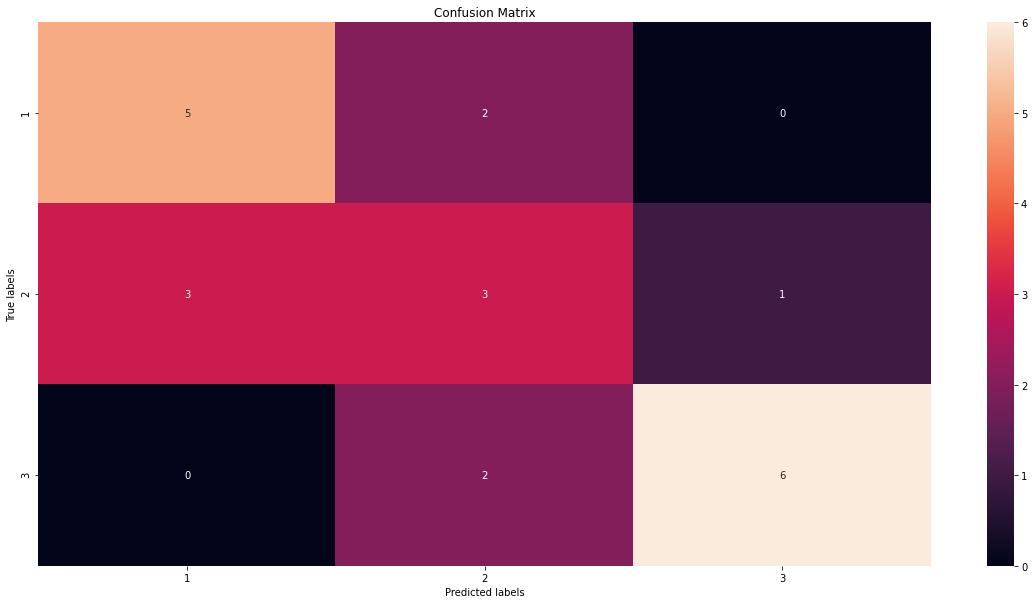

In [1007]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(np.unique(y_test))
ax.yaxis.set_ticklabels(np.unique(y_test))

In [1008]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.62      0.71      0.67         7
           2       0.43      0.43      0.43         7
           3       0.86      0.75      0.80         8

    accuracy                           0.64        22
   macro avg       0.64      0.63      0.63        22
weighted avg       0.65      0.64      0.64        22



<h1 id="Gradient_Boosting">
4. Gradient Boosting
<a class="anchor-link" href="https://www.kaggle.com/johnmantios/travel-review-ratings-dataset/edit/run/47115230#Gradient_Boosting">¶</a>
</h1>

In [826]:
from sklearn.ensemble import GradientBoostingClassifier

training_loss = []
test_loss = []

def tree_scores(i):
    clf_gb = GradientBoostingClassifier( max_depth=i, random_state = 42)
    
    
    clf_gb.fit(standardized_X_train, y_train.values.ravel())
    y_pred_gb = clf_gb.predict_proba(standardized_X_test)
    y_pred_train_gb = clf_gb.predict_proba(standardized_X_train)
    
     
    #print('Max Depth:' ,i)    
    #print('Training set score: {:.4f}'.format(clf_gb.score(standardized_X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_gb))

    #print('Test set score: {:.4f}'.format(clf_gb.score(standardized_X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_gb))
     
        
for i in range(1,11):
    tree_scores(i)

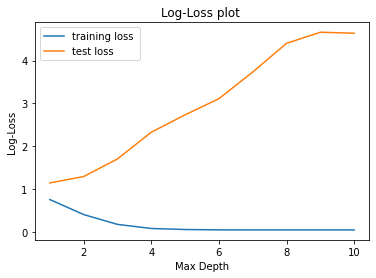

In [827]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [828]:
parameters = {'max_depth':range(1,11)}
clf = GridSearchCV(GradientBoostingClassifier( max_depth=i, random_state = 42),  parameters, n_jobs=4)
clf.fit(X=standardized_X_train, y=y_train.values.ravel())
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.39803921568627443 {'max_depth': 1}


In [831]:
clf_gb = GradientBoostingClassifier( max_depth=2, random_state = 42)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_gb, standardized_X_train, y_train.values.ravel(), cv=kfold)))

Cross-Validation Score: 0.3847222222222222


In [832]:
clf_gb = GradientBoostingClassifier( max_depth=2, random_state = 42)

clf_gb.fit(standardized_X_train, y_train.values.ravel())

GradientBoostingClassifier(max_depth=2, random_state=42)

In [833]:
y_pred_gb = clf_gb.predict(standardized_X_test)

In [834]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gb.score(standardized_X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gb.score(standardized_X_test, y_test)))

Training set score: 0.9205
Test set score: 0.4545


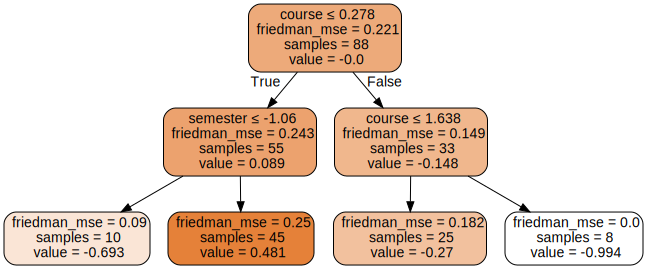

In [835]:
dot_data = tree.export_graphviz(clf_gb.estimators_[0, 0], out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.apply(str),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [836]:
cm = confusion_matrix(y_test, y_pred_gb)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4 1 2]
 [4 1 2]
 [1 2 5]]


[Text(0, 0.5, '2'), Text(0, 1.5, '3'), Text(0, 2.5, '1')]

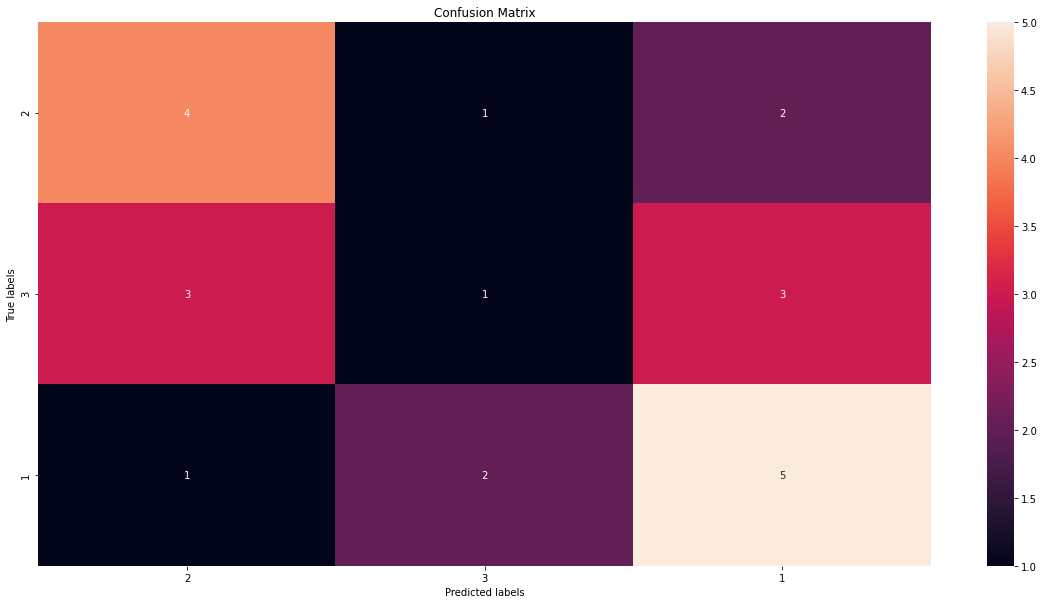

In [616]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(pd.unique(y_test.values.ravel()))
ax.yaxis.set_ticklabels(pd.unique(y_test.values.ravel()))

In [837]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.44      0.57      0.50         7
           2       0.25      0.14      0.18         7
           3       0.56      0.62      0.59         8

    accuracy                           0.45        22
   macro avg       0.42      0.45      0.42        22
weighted avg       0.42      0.45      0.43        22



<h1 id="XGB">
5. XGBOOST
<a class="anchor-link" href="https://www.kaggle.com/johnmantios/travel-review-ratings-dataset/edit/run/47115230#XGB">¶</a>
</h1

In [838]:
import xgboost as xgb

In [839]:
training_loss = []
test_loss = []

def tree_scores(i):
    clf_xgb = xgb.XGBClassifier( max_depth=i, random_state = 42, n_jobs = 4)
    
    
    clf_xgb.fit(standardized_X_train, y_train.values.ravel())
    y_pred_xgb = clf_xgb.predict_proba(standardized_X_test)
    y_pred_train_xgb = clf_xgb.predict_proba(standardized_X_train)
    
     
    #print('Max Depth:' ,i)    
    #print('Training set score: {:.4f}'.format(clf_xgb.score(standardized_X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_xgb))

    #print('Test set score: {:.4f}'.format(clf_xgb.score(standardized_X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_xgb))
     
        
for i in range(1,11):
    tree_scores(i)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:47:47] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:47:48] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:47:48] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:47:48] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:48] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:47:49] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:49] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:47:49] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:49] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:49] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



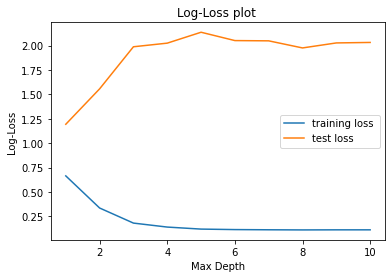

In [840]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [841]:
parameters = {'max_depth':range(1,11)}
clf = GridSearchCV(xgb.XGBClassifier( max_depth=i, random_state = 42),  parameters, n_jobs=4)
clf.fit(X=standardized_X_train, y=y_train.values.ravel())
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:48:19] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.3522875816993464 {'max_depth': 1}


In [843]:
clf_xgb = xgb.XGBClassifier( max_depth=1, random_state = 42)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_xgb, standardized_X_train, y_train.values.ravel(), cv=kfold)))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:48:28] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:28] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:28] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:28] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd li

In [847]:
clf_xgb = xgb.XGBClassifier( 
    max_depth=1,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5
)

clf_xgb.fit(standardized_X_train, y_train.values.ravel())


[22:48:40] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.8, gamma=2,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.800000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.5,
              reg_lambda=0.5, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [848]:
y_pred_xgb = clf_xgb.predict(standardized_X_test)

In [849]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_xgb.score(standardized_X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_xgb.score(standardized_X_test, y_test)))

Training set score: 0.5227
Test set score: 0.4545


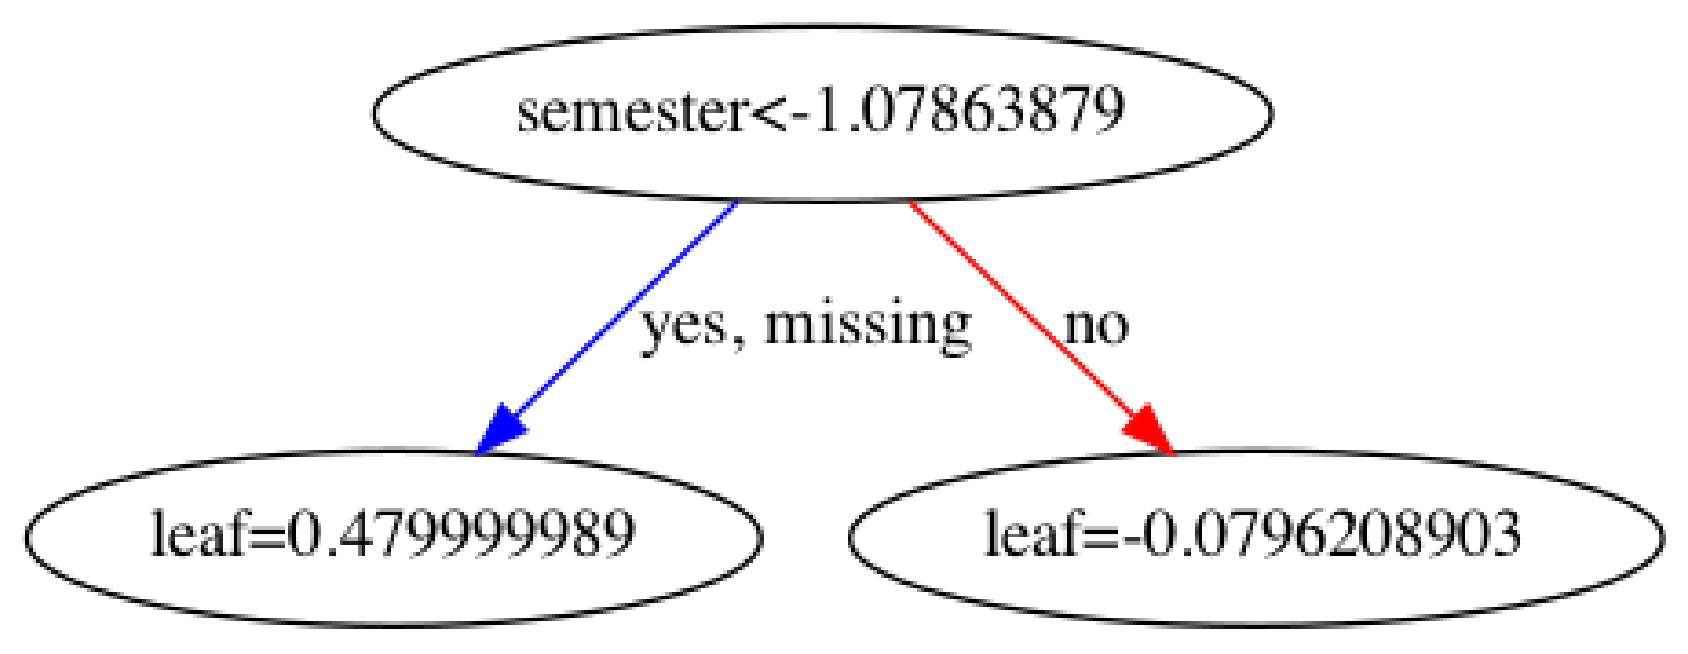

In [545]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(clf_xgb, num_trees=2, ax=ax)
plt.show()

In [850]:
cm = confusion_matrix(y_test, y_pred_xgb)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6 1 0]
 [4 2 1]
 [2 4 2]]


[Text(0, 0.5, '2'), Text(0, 1.5, '3'), Text(0, 2.5, '1')]

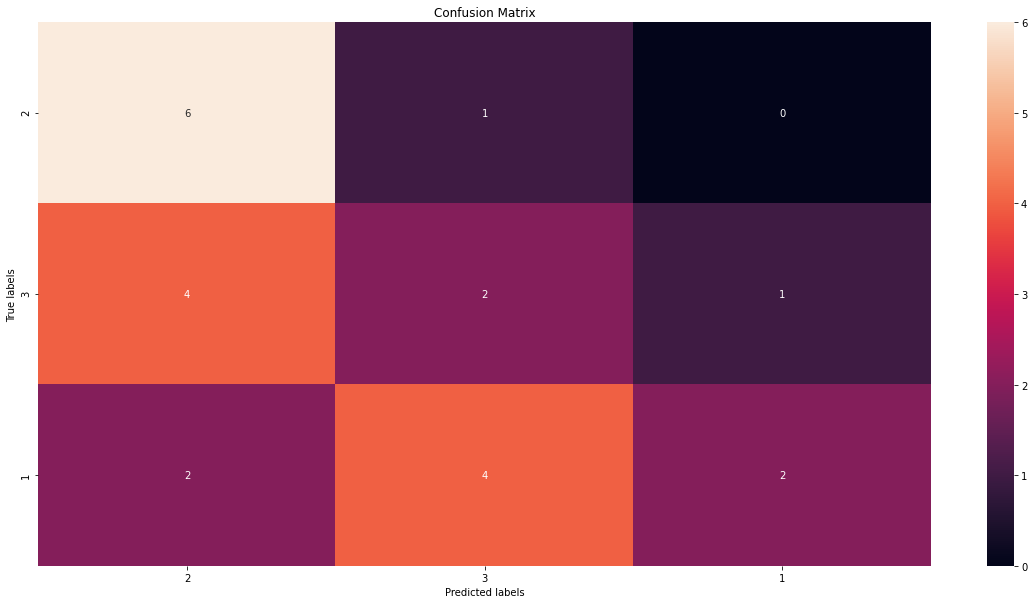

In [851]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(pd.unique(y_test.values.ravel()))
ax.yaxis.set_ticklabels(pd.unique(y_test.values.ravel()))

In [852]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           1       0.50      0.86      0.63         7
           2       0.29      0.29      0.29         7
           3       0.67      0.25      0.36         8

    accuracy                           0.45        22
   macro avg       0.48      0.46      0.43        22
weighted avg       0.49      0.45      0.42        22



<h1 id="Random_Forest">
6. Random Forest
<a class="anchor-link" href="https://www.kaggle.com/johnmantios/travel-review-ratings-dataset/edit/run/47115230#Random_Forest">¶</a>
</h1>

In [853]:
from sklearn.ensemble import RandomForestClassifier

training_loss = []
test_loss = []

def tree_scores(i):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    clf_rf = RandomForestClassifier( max_depth=i, random_state = 42, n_jobs = 4, n_estimators = 300, criterion = 'entropy')
    
    
    clf_rf.fit(X_train, y_train.values.ravel())
    y_pred_rf = clf_rf.predict_proba(X_test)
    y_pred_train_rf = clf_rf.predict_proba(X_train)
    
     
    #print('Max Depth:' ,i)    
    #print('Training set score: {:.4f}'.format(clf_rf.score(X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_rf))

    #print('Test set score: {:.4f}'.format(clf_rf.score(X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_rf))
     
        
for i in range(1,11):
    tree_scores(i)

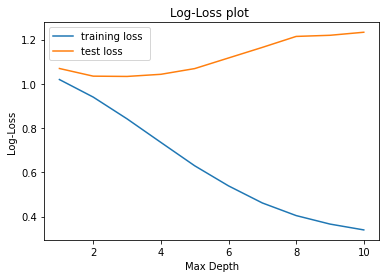

In [854]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [855]:
parameters = [{'max_depth':range(1,6), 'n_estimators' : [10,100,200,300,400]}]
clf = GridSearchCV(RandomForestClassifier(criterion = 'entropy',  random_state = 42),  parameters, n_jobs=-1)
clf.fit(X=standardized_X_train, y=y_train.values.ravel())
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.4647058823529412 {'max_depth': 2, 'n_estimators': 10}


In [856]:
clf_rf = RandomForestClassifier( max_depth=2, random_state = 42, n_estimators = 300, criterion = 'entropy', max_leaf_nodes = 2)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_rf, standardized_X_train, y_train.values.ravel(), cv=kfold)))

Cross-Validation Score: 0.42777777777777776


In [857]:
clf_rf = RandomForestClassifier(max_depth=2, random_state = 42, n_estimators = 300, criterion = 'entropy', max_leaf_nodes=2)

clf_rf.fit(standardized_X_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2,
                       n_estimators=300, random_state=42)

In [858]:
y_pred_rf = clf_rf.predict(standardized_X_test)

In [859]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_rf.score(standardized_X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_rf.score(standardized_X_test, y_test)))

Training set score: 0.6023
Test set score: 0.5455


In [860]:
cm = confusion_matrix(y_test, y_pred_rf)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[7 0 0]
 [5 1 1]
 [0 4 4]]


[Text(0, 0.5, '2'), Text(0, 1.5, '3'), Text(0, 2.5, '1')]

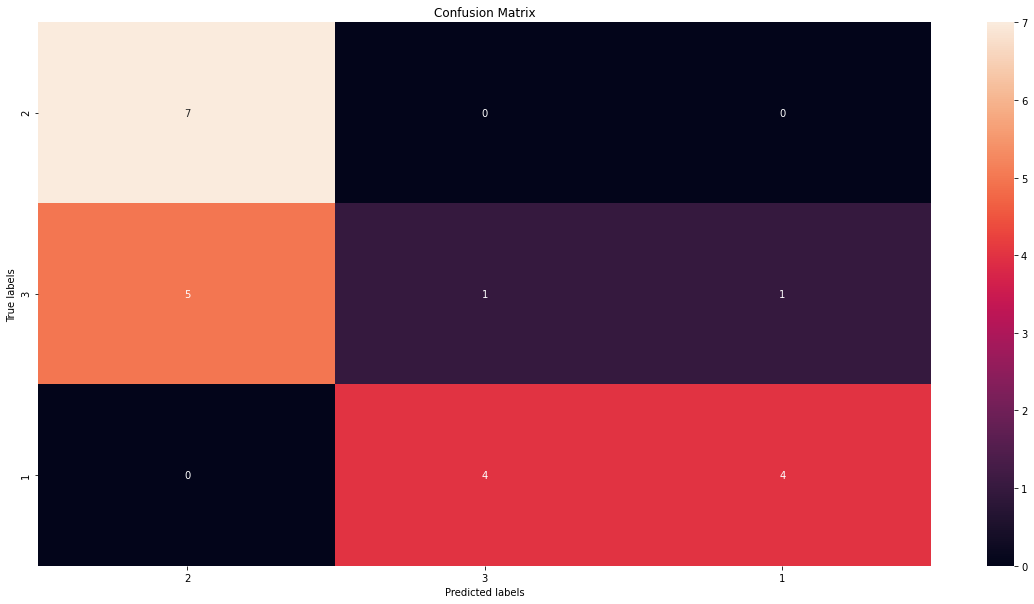

In [861]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(pd.unique(y_test.values.ravel()))
ax.yaxis.set_ticklabels(pd.unique(y_test.values.ravel()))

In [862]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.58      1.00      0.74         7
           2       0.20      0.14      0.17         7
           3       0.80      0.50      0.62         8

    accuracy                           0.55        22
   macro avg       0.53      0.55      0.51        22
weighted avg       0.54      0.55      0.51        22

